## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Student name:Sophie Hare
Student pace:Part-time
Scheduled project review date/time:5/11/2023
Instructor name:Samuel Jane

 Microsoft Movie Studio Analysis

Overview

The purpose of the exploratory analysis is to provide valuable insights into trends and patterns of developing movies, popular genres, audience preferences and market dynamics. Microsoft can then leverage these data-driven techniques to make informed decisions, guide processes of content creation and allocate resources for their new movie studio.

Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

In [1]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading datafiles into pandas dataframe
df1 = pd.read_csv('imdb.title.ratings.csv.gz')
df2 = pd.read_csv('bom.movie_gross.csv.gz')
df3 = pd.read_csv('imdb.title.basics.csv.gz')

In [3]:
#Checking basic info of the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [6]:
#Checking duplicate data
duplicate_rows= df1[df1.duplicated()]
duplicate_rows

,tconst,averagerating,numvotes


In [7]:
duplicate_rows= df2[df2.duplicated()]
duplicate_rows

,title,studio,domestic_gross,foreign_gross,year


In [8]:
duplicate_rows= df3[df3.duplicated()]
duplicate_rows

,tconst,primary_title,original_title,start_year,runtime_minutes,genres


In [9]:
#Checking for no of missing values
df1.isna().sum(), df2.isna().sum(), df3.isna().sum()

(tconst           0
 averagerating    0
 numvotes         0
 dtype: int64,
 title                0
 studio               5
 domestic_gross      28
 foreign_gross     1350
 year                 0
 dtype: int64,
 tconst                 0
 primary_title          0
 original_title        21
 start_year             0
 runtime_minutes    31739
 genres              5408
 dtype: int64)

In [10]:
#Fill in missing values in genre column with Unknown
df3['genres'].fillna('Unknown',inplace=True)

In [11]:
#Fill missing values in runtime column with median
df3['runtime_minutes'].fillna(df3['runtime_minutes'].median(),inplace=True)

In [12]:
#Drop columns original title and start year
df3.drop(['original_title','start_year'],axis=1, inplace=True)

In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   runtime_minutes  146144 non-null  float64
 3   genres           146144 non-null  object 
dtypes: float64(1), object(3)
memory usage: 4.5+ MB


In [16]:
#Fill in values in foreign gross and domestic gross with median
df2['domestic_gross'].fillna(df2['domestic_gross'].median(),inplace=True)

In [20]:
df2['foreign_gross'].str.strip(',')

0       652000000
1       691300000
2       664300000
3       535700000
4       513900000
          ...    
3382          NaN
3383          NaN
3384          NaN
3385          NaN
3386          NaN
Name: foreign_gross, Length: 3382, dtype: object

In [31]:
df2['foreign_gross'].str.replace(' ','').str.replace(',','').astype(float)

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3382            NaN
3383            NaN
3384            NaN
3385            NaN
3386            NaN
Name: foreign_gross, Length: 3382, dtype: float64

In [32]:
df2['foreign_gross'].fillna(df2['foreign_gross'].median(),inplace=True)

TypeError: could not convert string to float: '1,131.6'

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   2033 non-null   object 
 4   year            3382 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 158.5+ KB


In [18]:
#Drop rows where studio name is missing
df2.dropna(axis=0, subset=['studio'], inplace=True)

In [33]:
#Merging dataframes on the tconst column
merged_df=pd.merge(df3,df1, on='tconst')

In [34]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   runtime_minutes  73856 non-null  float64
 3   genres           73856 non-null  object 
 4   averagerating    73856 non-null  float64
 5   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 3.9+ MB


In [35]:
#Saving merged data
merged_df.to_csv('merged_data.csv', index=False)

In [41]:
#Converting domestic gross to millions of dollars
df2['domestic_gross']= df2['domestic_gross']/10**6

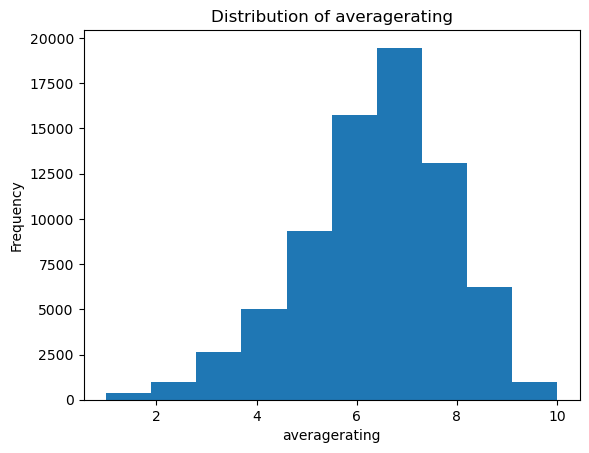

In [36]:
#Plot a histogram of average rating column
plt.hist(merged_df['averagerating'], bins=10)
plt.xlabel('averagerating')
plt.ylabel('Frequency')
plt.title('Distribution of averagerating')
plt.show()

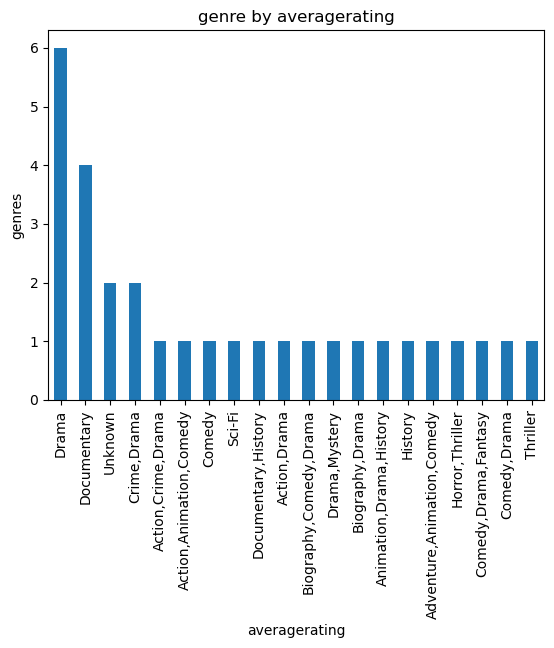

In [37]:
#Plot a bar chart of genres against average rating
merged_df.head(30)['genres'].value_counts().plot(kind='bar')
plt.title('genre by averagerating')
plt.xlabel('averagerating')
plt.ylabel('genres')
plt.show()

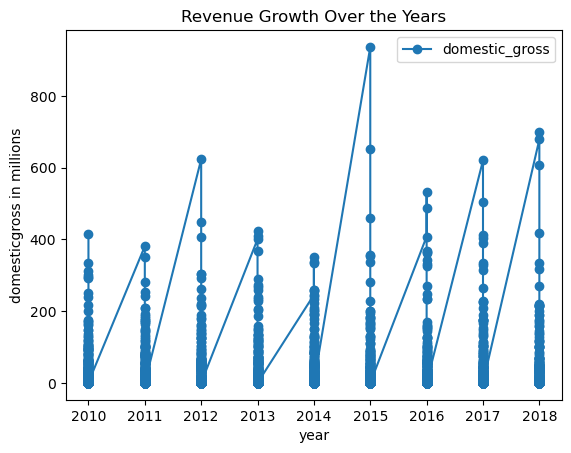

In [43]:
#Plotting a line graph of domestic gross over the years
df2.plot(x='year', y='domestic_gross', kind='line', marker='o')
plt.title('Revenue Growth Over the Years')
plt.xlabel('year')
plt.ylabel('domesticgross in millions')
plt.show()

The analysis yielded three concrete business recommendations.

**Investing in projects with a high level of critical acclaim e.g movies with an average rating of 7.0 and above. Such films are bound to resonate with audiences and attract a loyal fan base.
** Optimizing budget allocation based on succeful movie attributes.By analyzing successful movie attributes, such as genre, ratings, and marketing strategies, Microsoft's movie studio can optimize budget allocation and ensure resources are allocated in areas that contribute to maximum returns.
** Exploring opportunities to create movies that appeal to a broad audience as such films have a great potential to generate significant box office revenue.

Conclusion
These three key business recommendations for Microsoft's movie studio are to focus on genres with high box office success rates, prioritize quality content to improve ratings, and optimize budget allocation based on successful movie attributes. Implementing these recommendations will position the studio for success in the competitive movie industry.